# Import Essential Libraries

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
import optuna
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Load the Data

In [2]:
df_train = pd.read_csv(r"C:\Users\user\Desktop\Regression of Used Car Prices\train.csv")
df_test = pd.read_csv(r"C:\Users\user\Desktop\Regression of Used Car Prices\test.csv")

In [3]:
df_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [4]:
df_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


# Handle Missing Values

In [7]:
df_test['clean_title'].fillna('No', inplace=True)
df_train['clean_title'].fillna('No', inplace=True)

# Feature Engineering

In [8]:
current_year = 2024
# Calculate vehicle age and mileage per year
def create_features(df):
    df['vehicle_age'] = current_year - df['model_year']  
    df['mileage_per_year'] = df['milage'] / df['vehicle_age']
    df['mileage_per_year'].replace([np.inf, -np.inf], 0, inplace=True)   
    df['has_accident_history'] = df['accident'].apply(lambda x: 1 if pd.isnull(x) or x == 'At least 1 accident or damage reported' else 0)
    return df
df_train = create_features(df_train)
df_test = create_features(df_test)

In [9]:
df_train.drop(columns = 'accident',inplace=True)
df_test.drop(columns = 'accident',inplace=True)

# Extract Engine Features

In [10]:
def extract_hp(engine):
    match = re.search(r'(\d+(\.\d+)?)HP', engine)
    return float(match.group(1)) if match else None

def extract_displacement(engine):
    match = re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', engine)
    if match:
        # Check if the first group matched, otherwise use the second group
        return float(match.group(1) or match.group(2))

def extract_cylinder_count(engine):
    match = re.search(r'(\d+) Cylinder', engine)
    return int(match.group(1)) if match else None

def extract_fuel_type(engine):
    fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid', 'Flex Fuel']
    for fuel in fuel_types:
        if fuel in engine:
            return fuel
    return None

In [11]:
# Apply extraction functions to the training and test datasets
df_train['Horsepower'] = df_train['engine'].apply(extract_hp)
df_train['Displacement'] = df_train['engine'].apply(extract_displacement)
df_train['Cylinder Count'] = df_train['engine'].apply(extract_cylinder_count)
df_test['Horsepower'] = df_test['engine'].apply(extract_hp)
df_test['Displacement'] = df_test['engine'].apply(extract_displacement)
df_test['Cylinder Count'] = df_test['engine'].apply(extract_cylinder_count)

In [12]:
# Impute Missing Values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train[['Horsepower', 'Cylinder Count']] = imputer.fit_transform(df_train[['Horsepower', 'Cylinder Count']])
df_test[['Horsepower', 'Cylinder Count']] = imputer.transform(df_test[['Horsepower', 'Cylinder Count']])

In [14]:
df_train.drop(['engine'], axis=1, inplace=True)
df_test.drop(['engine'], axis=1, inplace=True)
df_train.drop(['model'], axis=1, inplace=True)
df_test.drop(['model'], axis=1, inplace=True)
df_train['fuel_type'] = df_train['fuel_type'].replace([np.nan, 'not supported', '–'], 'Unknown')
df_test['fuel_type'] = df_test['fuel_type'].replace([np.nan, 'not supported', '–'], 'Unknown')
df_train['Displacement'].fillna(value=df_train['Displacement'].mean(),inplace=True)
df_test['Displacement'].fillna(value=df_test['Displacement'].mean(),inplace=True)

In [15]:
df_train['transmission'] = df_train['transmission'].str.strip().str.lower()

transmission_mapping = {

    '6-speed a/t': 'Automatic',
    '8-speed automatic': 'Automatic',
    'automatic': 'Automatic',
    '7-speed a/t': 'Automatic',
    'a/t': 'Automatic',
    '8-speed a/t': 'Automatic',
    'transmission w/dual shift mode': 'Automatic',
    '9-speed automatic': 'Automatic',
    '10-speed automatic': 'Automatic',
    '1-speed a/t': 'Automatic',
    '2-speed a/t': 'Automatic',
    '2-speed automatic': 'Automatic',
    '4-speed a/t': 'Automatic',
    '5-speed automatic': 'Automatic',
    '4-speed automatic': 'Automatic',
    '6-speed automatic': 'Automatic', 
    '9-speed a/t': 'Automatic',        
    '10-speed a/t': 'Automatic',      
    '7-speed automatic': 'Automatic',  
    '6-speed electronically controlled automatic with o': 'Automatic',
    'single-speed fixed gear': 'Automatic',
    '7-speed dct automatic': 'Automatic',
    '10-speed automatic with overdrive': 'Automatic',
    'automatic, 9-spd 9g-tronic': 'Automatic',
    'automatic, 8-spd': 'Automatic',
    'automatic, 8-spd sport w/sport & manual modes': 'Automatic',
    'automatic, 8-spd pdk dual-clutch': 'Automatic',
    'automatic, 8-spd m steptronic w/drivelogic, sport & manual modes': 'Automatic',
    'automatic, 8-spd dual-clutch': 'Automatic',
    'transmission overdrive switch': 'Automatic',  
    
 
    '7-speed automatic with auto-shift': 'Tiptronic',
    '5-speed a/t': 'Tiptronic',
    '7-speed a/t tiptronic': 'Tiptronic',  
    '8-speed at': 'Tiptronic',
    '8-speed a/t': 'Tiptronic',
    
 
    '6-speed m/t': 'Manual',
    '7-speed m/t': 'Manual',
    '6-speed manual': 'Manual',
    '5-speed m/t': 'Manual',
    'manual': 'Manual',
    '7-speed manual': 'Manual',
    '8-speed manual': 'Manual',
    'm/t': 'Manual',
    '6 speed at/mt': 'Manual',
    '6 speed mt': 'Manual',

 
    'automatic cvt': 'Variator',
    'cvt transmission': 'Variator',
    'cvt-f': 'Variator',
    
  
    'variable': 'Variator',
    'f': 'Other',                        
    '7-speed': 'Other',                 
    '6-speed': 'Other',                  
    '2': 'Other',                       
    '–': 'Other',
    'scheduled for or in production': 'Other'
}


df_train['transmission'] = df_train['transmission'].replace(transmission_mapping)


print(df_train['transmission'].value_counts())

transmission
Automatic                            142801
Tiptronic                             25054
Manual                                16415
Variator                               2900
8-speed automatic with auto-shift       549
1-speed automatic                       365
Other                                   305
6-speed automatic with auto-shift       111
9-speed automatic with auto-shift        33
Name: count, dtype: int64


In [16]:
# Simplify transmission labels
def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    elif 'Tiptronic' in transmission:
        return 'Tiptronic'
    elif 'Variator' in transmission:
        return 'Variator'
    else:
        return 'Other'


df_train['transmission'] = df_train['transmission'].apply(simplify_transmission)


df_train['transmission'].value_counts()

transmission
Automatic    142801
Tiptronic     25054
Manual        16415
Variator       2900
Other          1363
Name: count, dtype: int64

In [21]:
df_test['transmission'] = df_test['transmission'].replace(transmission_mapping)


print(df_test['transmission'].value_counts())

transmission
A/T                                                   33132
8-Speed A/T                                           13941
Transmission w/Dual Shift Mode                        12824
6-Speed A/T                                           12061
6-Speed M/T                                            7865
7-Speed A/T                                            7374
Automatic                                              7175
8-Speed Automatic                                      5546
10-Speed A/T                                           5303
9-Speed A/T                                            2584
5-Speed A/T                                            2241
10-Speed Automatic                                     2104
6-Speed Automatic                                      1891
4-Speed A/T                                            1666
5-Speed M/T                                            1639
9-Speed Automatic                                      1553
CVT Transmission           

In [27]:
def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    elif 'Tiptronic' in transmission:
        return 'Tiptronic'
    elif 'Variator' in transmission:
        return 'Variator'
    else:
        return 'Other'


df_test['transmission'] = df_test['transmission'].apply(simplify_transmission)


df_test['transmission'].value_counts()

transmission
Other        104780
Automatic     20650
Manual          260
Name: count, dtype: int64

In [28]:
df_train["transmission"] = df_train["transmission"].replace({'Automatic':1,
                                                'Tiptronic':2,
                                                'Manual':3,
                                                'Variator':4,
                                                'Other':5})
df_train["transmission"].value_counts()

transmission
1    142801
2     25054
3     16415
4      2900
5      1363
Name: count, dtype: int64

In [29]:
df_test["transmission"] = df_test["transmission"].replace({'Automatic':1,
                                                'Tiptronic':2,
                                                'Manual':3,
                                                'Variator':4,
                                                'Other':5})
df_test["transmission"].value_counts()

transmission
5    104780
1     20650
3       260
Name: count, dtype: int64

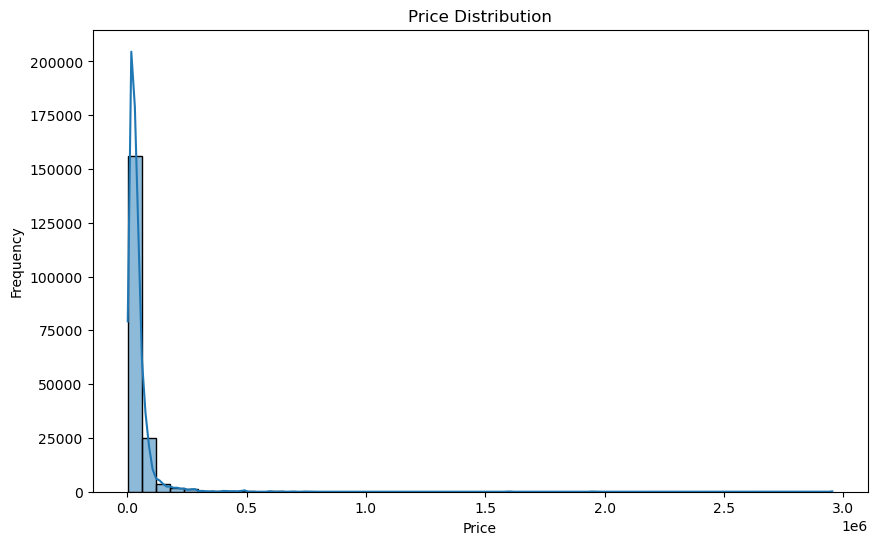

In [30]:
# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Categorical features
cat_features = df_train.select_dtypes(include=['object']).columns
print("Categorical Features:", cat_features)

# Numerical features
num_features = df_train.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", num_features)

Categorical Features: Index(['brand', 'fuel_type', 'ext_col', 'int_col', 'clean_title'], dtype='object')
Numerical Features: Index(['id', 'model_year', 'milage', 'transmission', 'price', 'vehicle_age',
       'mileage_per_year', 'has_accident_history', 'Horsepower',
       'Displacement', 'Cylinder Count'],
      dtype='object')


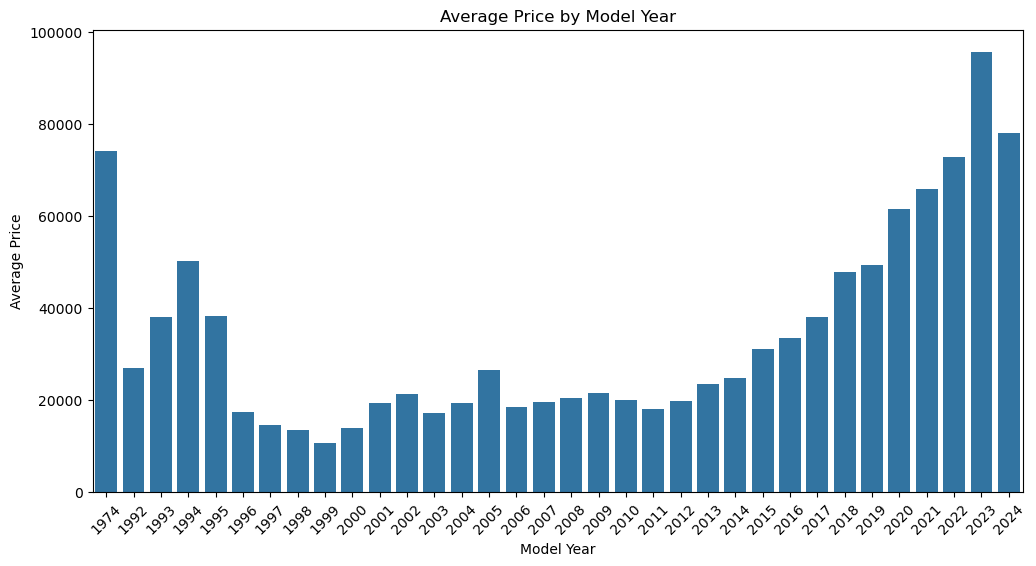

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=df_train, errorbar=None)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [34]:
desc = pd.DataFrame(index = list(df_train))
desc['type'] = df_train.dtypes
desc['count'] = df_train.count()
desc['nunique'] = df_train.nunique()
desc['%unique'] = desc['nunique'] /len(df_train) * 100
desc['null'] = df_train.isnull().sum()
desc['%null'] = desc['null'] / len(df_train) * 100
desc = pd.concat([desc,df_train.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
id,int64,188533,188533,100.000000,0,0.000000,94266.000000,54424.933488,0.000000,47133.000000,94266.000000,141399.000000,188532.000000
model_year,int64,188533,34,0.018034,0,0.000000,2015.829998,5.660967,1974.000000,2013.000000,2017.000000,2020.000000,2024.000000
milage,int64,188533,6651,3.527764,0,0.000000,65705.295174,49798.158076,100.000000,24115.000000,57785.000000,95400.000000,405000.000000
transmission,int64,188533,5,0.002652,0,0.000000,1.382087,0.767645,1.000000,1.000000,1.000000,1.000000,5.000000
price,int64,188533,1569,0.832215,0,0.000000,43878.016178,78819.522254,2000.000000,17000.000000,30825.000000,49900.000000,2954083.000000
vehicle_age,int64,188533,34,0.018034,0,0.000000,8.170002,5.660967,0.000000,4.000000,7.000000,11.000000,50.000000
has_accident_history,int64,188533,2,0.001061,0,0.000000,0.233482,0.423047,0.000000,0.000000,0.000000,0.000000,1.000000
mileage_per_year,float64,188533,30199,16.017885,0,0.000000,8683.746899,6260.753703,0.000000,5156.200000,8000.000000,11000.000000,235000.000000
Horsepower,float64,188533,352,0.186705,0,0.000000,343.333941,104.174964,70.000000,280.000000,343.263856,395.000000,1020.000000
Displacement,float64,188533,62,0.032885,0,0.000000,3.775272,1.327425,0.650000,3.000000,3.500000,4.700000,8.400000


In [35]:
desc = pd.DataFrame(index = list(df_test))
desc['type'] = df_test.dtypes
desc['count'] = df_test.count()
desc['nunique'] = df_test.nunique()
desc['%unique'] = desc['nunique'] /len(df_test) * 100
desc['null'] = df_test.isnull().sum()
desc['%null'] = desc['null'] / len(df_test) * 100
desc = pd.concat([desc,df_test.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
id,int64,125690,125690,100.000000,0,0.000000,251377.500000,36283.722005,188533.000000,219955.250000,251377.500000,282799.750000,314222.000000
model_year,int64,125690,36,0.028642,0,0.000000,2015.797526,5.673797,1974.000000,2013.000000,2017.000000,2020.000000,2024.000000
milage,int64,125690,5700,4.534967,0,0.000000,66042.581510,50223.858435,100.000000,24500.000000,57500.000000,95798.000000,405000.000000
transmission,int64,125690,3,0.002387,0,0.000000,4.338690,1.483122,1.000000,5.000000,5.000000,5.000000,5.000000
vehicle_age,int64,125690,36,0.028642,0,0.000000,8.202474,5.673797,0.000000,4.000000,7.000000,11.000000,50.000000
has_accident_history,int64,125690,2,0.001591,0,0.000000,0.234124,0.423452,0.000000,0.000000,0.000000,0.000000,1.000000
mileage_per_year,float64,125690,25436,20.237091,0,0.000000,8677.812389,6351.530013,0.000000,5166.666667,8000.000000,11000.000000,199750.000000
Horsepower,float64,125690,351,0.279258,0,0.000000,342.957708,104.204252,70.000000,280.000000,343.263856,395.000000,1020.000000
Displacement,float64,125690,62,0.049328,0,0.000000,3.769511,1.325261,0.650000,3.000000,3.500000,4.600000,8.400000
Cylinder Count,float64,125690,16,0.012730,0,0.000000,6.395814,1.417786,3.000000,6.000000,6.000000,8.000000,12.000000


In [36]:
X = df_train.drop(columns=['price', 'id'])
y = df_train['price']
X_test = df_test.drop(columns=['id'])

# Encode categorical variables using CatBoost's built-in method
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Optional: Display the number of categorical features
print("Categorical features:", cat_features)

Categorical features: ['brand', 'fuel_type', 'ext_col', 'int_col', 'clean_title']


In [37]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),  # Reduced upper limit
        'depth': trial.suggest_int('depth', 4, 7),  # Narrowed depth range
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 5),  # Reduced upper limit
        'random_seed': 42,
        'task_type': 'CPU'  # Ensure to use CPU to avoid CUDA issues
    }

    # Use KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced number of splits
    rmse_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Initialize and train the model
        model = CatBoostRegressor(**params, cat_features=cat_features, verbose=0)
        model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=20, verbose=0)  # Reduced early stopping rounds
        
        # Predictions and score calculation
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE score for this set of parameters
    return np.mean(rmse_scores)

# Running Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # Adjust trials as needed

# Display best parameters
print('Best trial:', study.best_trial.params)

[I 2024-09-24 18:54:23,692] A new study created in memory with name: no-name-5ff9fead-7fb2-44ab-b8c7-e31e26c0da5d
[I 2024-09-24 18:55:25,167] Trial 0 finished with value: 78438.54303547746 and parameters: {'iterations': 497, 'depth': 4, 'learning_rate': 6.925065084711163e-05, 'l2_leaf_reg': 3.939333073545909}. Best is trial 0 with value: 78438.54303547746.
[I 2024-09-24 18:56:25,028] Trial 1 finished with value: 76650.7686034047 and parameters: {'iterations': 492, 'depth': 4, 'learning_rate': 0.0006506929331111859, 'l2_leaf_reg': 4.966328410987847}. Best is trial 1 with value: 76650.7686034047.
[I 2024-09-24 18:56:39,958] Trial 2 finished with value: 78473.97392162895 and parameters: {'iterations': 185, 'depth': 5, 'learning_rate': 0.00015609771852670423, 'l2_leaf_reg': 4.736167608546924}. Best is trial 1 with value: 76650.7686034047.
[I 2024-09-24 18:57:21,516] Trial 3 finished with value: 78043.93209020028 and parameters: {'iterations': 269, 'depth': 5, 'learning_rate': 0.00030561145

Best trial: {'iterations': 328, 'depth': 6, 'learning_rate': 0.07696373776707728, 'l2_leaf_reg': 1.9412594960878367}


In [38]:
best_params = study.best_trial.params

# Initialize the model with the best parameters
final_model = CatBoostRegressor(**best_params, cat_features=cat_features, random_seed=42, verbose=100)

# Train on the entire training dataset
final_model.fit(X, y)

# Predict on the test dataset
y_test_pred = final_model.predict(X_test)

0:	learn: 78120.7069749	total: 76.3ms	remaining: 25s
100:	learn: 72283.4773631	total: 8.28s	remaining: 18.6s
200:	learn: 71650.5290008	total: 16s	remaining: 10.1s
300:	learn: 71164.2427332	total: 23.5s	remaining: 2.11s
327:	learn: 70986.8029715	total: 25.9s	remaining: 0us
